In [1]:
import pandas as pd
import numpy as np
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
context = pd.read_csv('training.csv')

In [3]:
context.head(5)

,student_id,level,course,grade,major
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations


In [4]:
context.describe()

,student_id,level,course,grade,major
count,97276,97276,97276,97276,97276
unique,10000,4,2721,21,81
top,cJdq8OlOg2x4drwW,Senior,RHET:103,A,Psychology
freq,90,30367,1685,18729,10274


In [5]:
print(context.shape)

(97276, 5)


In [6]:
context = context[context.grade != 'WX']
print(context.shape)

(97222, 5)


In [7]:
context2 = pd.read_csv('eval.csv')
context2 = context2[context2.grade != 'WX']
print(context2.shape)
context2.head()

(19432, 7)


,student_id,level,course,grade,major1,major2,major3
0,6Q79FVMSbTPMBhha,Senior,ECE:489,A,NaN,NaN,NaN
1,6Q79FVMSbTPMBhha,Sophomore,MATH:246,B,NaN,NaN,NaN
2,6Q79FVMSbTPMBhha,Sophomore,ECE:344,C+,NaN,NaN,NaN
3,6Q79FVMSbTPMBhha,Junior,ARTS:280,B,NaN,NaN,NaN
4,6Q79FVMSbTPMBhha,Freshman,CSI:160,AUS,NaN,NaN,NaN


In [8]:
context2.drop(context2.columns[5:7], axis=1, inplace=True)
context2.head()

,student_id,level,course,grade,major1
0,6Q79FVMSbTPMBhha,Senior,ECE:489,A,NaN
1,6Q79FVMSbTPMBhha,Sophomore,MATH:246,B,NaN
2,6Q79FVMSbTPMBhha,Sophomore,ECE:344,C+,NaN
3,6Q79FVMSbTPMBhha,Junior,ARTS:280,B,NaN
4,6Q79FVMSbTPMBhha,Freshman,CSI:160,AUS,NaN


In [9]:
context3=context2.rename(columns={'major1':'major'})
context3

,student_id,level,course,grade,major
0,6Q79FVMSbTPMBhha,Senior,ECE:489,A,NaN
1,6Q79FVMSbTPMBhha,Sophomore,MATH:246,B,NaN
2,6Q79FVMSbTPMBhha,Sophomore,ECE:344,C+,NaN
3,6Q79FVMSbTPMBhha,Junior,ARTS:280,B,NaN
4,6Q79FVMSbTPMBhha,Freshman,CSI:160,AUS,NaN
5,6Q79FVMSbTPMBhha,Junior,ECE:336,A-,NaN
6,6Q79FVMSbTPMBhha,Junior,ECE:332,B+,NaN
7,6Q79FVMSbTPMBhha,Senior,CS:370,A-,NaN
8,6Q79FVMSbTPMBhha,Sophomore,LS:101,S,NaN
9,6Q79FVMSbTPMBhha,Freshman,ARTH:106,B-,NaN


In [10]:
result = context.append(context3)
result

,student_id,level,course,grade,major
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations
5,PiPkSgMGbFIu5RwR,Sophomore,SPAN:140,D+,International Relations
6,PiPkSgMGbFIu5RwR,Freshman,POLI:140,C,International Relations
7,PiPkSgMGbFIu5RwR,Sophomore,KORE:210,A,International Relations
8,PiPkSgMGbFIu5RwR,Sophomore,SPAN:309,A,International Relations
9,PiPkSgMGbFIu5RwR,Sophomore,ENTR:134,B,International Relations


In [11]:
#116654-97222

In [12]:
dummy=pd.get_dummies(result['grade'])

In [13]:
dummy.head()

,A,A+,A-,AUS,AUU,B,B+,B-,C,C+,C-,D,D+,D-,I,N,P,R,S,U
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
result=pd.concat([result,dummy],axis=1)
result

,student_id,level,course,grade,major,A,A+,A-,AUS,AUU,...,C-,D,D+,D-,I,N,P,R,S,U
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,PiPkSgMGbFIu5RwR,Sophomore,SPAN:140,D+,International Relations,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,PiPkSgMGbFIu5RwR,Freshman,POLI:140,C,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,PiPkSgMGbFIu5RwR,Sophomore,KORE:210,A,International Relations,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PiPkSgMGbFIu5RwR,Sophomore,SPAN:309,A,International Relations,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,PiPkSgMGbFIu5RwR,Sophomore,ENTR:134,B,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dummy2=pd.get_dummies(result['course'])

In [16]:
dummy2.head()

,006:100,ABRD:301,ABRD:302,ABRD:303,ABRD:304,ABRD:306,ABRD:307,ABRD:308,ABRD:309,ABRD:311,...,WRIT:100,WRIT:140,WRIT:160,WRIT:310,WRIT:326,WRIT:374,WRIT:390,WRIT:400,WRIT:474,WRIT:476
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
result=pd.concat([result,dummy2],axis=1)
result.head()

,student_id,level,course,grade,major,A,A+,A-,AUS,AUU,...,WRIT:100,WRIT:140,WRIT:160,WRIT:310,WRIT:326,WRIT:374,WRIT:390,WRIT:400,WRIT:474,WRIT:476
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dummy3=pd.get_dummies(result['level'])
dummy3.head()

,Freshman,Junior,Senior,Sophomore
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [19]:
result=pd.concat([result,dummy3],axis=1)
result.head()

,student_id,level,course,grade,major,A,A+,A-,AUS,AUU,...,WRIT:326,WRIT:374,WRIT:390,WRIT:400,WRIT:474,WRIT:476,Freshman,Junior,Senior,Sophomore
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
dummy4=pd.get_dummies(result['student_id'])
dummy4.head()

,01BVNwmXUXsoVHLd,01DiJuoJAB395ucJ,01MhxeQl5FhRsf3f,01W7KB8TDNWNx4YW,03TWkCsakXIVrOtA,042Rmpv5B2kXdfBR,04DuzbneGqk0o0jY,04TIITMjjPIVIkES,04vxIYe6guefIhGD,04yPdcfnDzHbSIsS,...,zx4TjtzsmEHeULeo,zx6fskg55IgkzEDA,zz1XYEbqcaXz5ICW,zzL9tMAJh28lzEb7,zzOFhJF3YHyXmwbV,zzTJwgTritjISIOS,zzWgxK0AfTmln8wS,zzX9IzDFcBfprIhm,zzmL0Yv0ksPiCaaq,zznsrO2NfjMPqg4I
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
result=pd.concat([result,dummy4],axis=1)
result.head()

,student_id,level,course,grade,major,A,A+,A-,AUS,AUU,...,zx4TjtzsmEHeULeo,zx6fskg55IgkzEDA,zz1XYEbqcaXz5ICW,zzL9tMAJh28lzEb7,zzOFhJF3YHyXmwbV,zzTJwgTritjISIOS,zzWgxK0AfTmln8wS,zzX9IzDFcBfprIhm,zzmL0Yv0ksPiCaaq,zznsrO2NfjMPqg4I
0,ppVGBRKhtqqyxnVO,Freshman,SPAN:100,A,Business,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PiPkSgMGbFIu5RwR,Freshman,CSI:160,S,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PiPkSgMGbFIu5RwR,Sophomore,EES:107,C,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PiPkSgMGbFIu5RwR,Senior,SPAN:201,B,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PiPkSgMGbFIu5RwR,Junior,ENTR:200,B+,International Relations,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
result.drop(result.columns[0:4], axis=1, inplace=True)

In [23]:
result.head()

,major,A,A+,A-,AUS,AUU,B,B+,B-,C,...,zx4TjtzsmEHeULeo,zx6fskg55IgkzEDA,zz1XYEbqcaXz5ICW,zzL9tMAJh28lzEb7,zzOFhJF3YHyXmwbV,zzTJwgTritjISIOS,zzWgxK0AfTmln8wS,zzX9IzDFcBfprIhm,zzmL0Yv0ksPiCaaq,zznsrO2NfjMPqg4I
0,Business,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,International Relations,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,International Relations,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,International Relations,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,International Relations,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
result.describe()

,A,A+,A-,AUS,AUU,B,B+,B-,C,C+,...,zx4TjtzsmEHeULeo,zx6fskg55IgkzEDA,zz1XYEbqcaXz5ICW,zzL9tMAJh28lzEb7,zzOFhJF3YHyXmwbV,zzTJwgTritjISIOS,zzWgxK0AfTmln8wS,zzX9IzDFcBfprIhm,zzmL0Yv0ksPiCaaq,zznsrO2NfjMPqg4I
count,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,...,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000,116654.000000
mean,0.192681,0.033724,0.117587,0.001577,0.000060,0.146750,0.106460,0.075951,0.074494,0.056715,...,0.000129,0.000009,0.000043,0.000163,0.000111,0.000009,0.000146,0.000009,0.000326,0.000009
std,0.394406,0.180518,0.322120,0.039684,0.007746,0.353858,0.308427,0.264921,0.262574,0.231298,...,0.011339,0.002928,0.006547,0.012761,0.010556,0.002928,0.012071,0.002928,0.018046,0.002928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X = result.iloc[0:97222, 1:14841].values
y = result.iloc[0:97222, 0].values

In [26]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
y=pd.DataFrame(data=y)
y

,0
0,Business
1,International Relations
2,International Relations
3,International Relations
4,International Relations
5,International Relations
6,International Relations
7,International Relations
8,International Relations
9,International Relations


In [28]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

/Users/paragkedia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([11, 45, 45, ...,  5,  5,  5])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/paragkedia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/paragkedia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)
y_pred

array([52,  5,  9, ..., 68, 43, 21])

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[618,   0,   0, ...,   0,   0,   0],
       [  0,  99,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,  30,   0],
       [  0,   0,   0, ...,   0,   0,   1]])

In [33]:
classifier.score(X_test, y_test)

0.9812291077397789

In [34]:
X1 = result.iloc[97222:, 1:14841].values
X1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
y_pred = classifier.predict(X1)
y_pred

array([27, 27, 27, ..., 68, 68,  5])

In [36]:
ypredicted = labelencoder_y.inverse_transform(y_pred)
ypredicted
major=pd.DataFrame(data=ypredicted)
major

,0
0,Electrical Engineering
1,Electrical Engineering
2,Electrical Engineering
3,Art
4,Computer Science
5,Electrical Engineering
6,Electrical Engineering
7,Electrical Engineering
8,Psychology
9,Art


In [37]:
major.to_excel(r'Majors.xlsx')

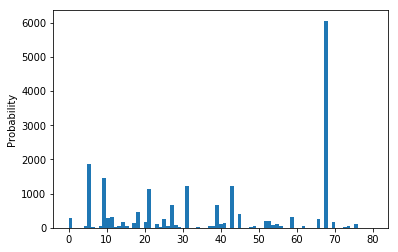

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(y_pred, bins=81)
plt.ylabel('Probability');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

In [ ]:
y_pred2 = classifier2.predict(X1)
y_pred2

In [ ]:
classifier2.score(X_test, y_test)

In [ ]:
ypredicted2 = labelencoder_y.inverse_transform(y_pred2)
ypredicted2
major2=pd.DataFrame(data=ypredicted2)
major2

In [ ]:
major2.to_excel(r'Majors2.xlsx')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(y_pred2, bins=81)
plt.ylabel('Probability');

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)

In [ ]:
y_pred3 = classifier3.predict(X1)
y_pred3

In [ ]:
classifier3.score(X_test, y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

In [ ]:
y_pred4 = classifier4.predict(X1)
y_pred4

In [ ]:
classifier4.score(X_test, y_test)